In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(-1, 784)

# Generator
generator = Sequential([
    Dense(128, input_dim=100),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(512),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(784, activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Dense(512, input_dim=784),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combined network
discriminator.trainable = False
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Create directory if it doesn't exist
if not os.path.exists('generated_images1'):
    os.makedirs('generated_images1')

# Training
epochs, batch_size, half_batch = 10000, 64, 32

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images, noise = X_train[idx], np.random.normal(0, 1, (half_batch, 100))

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generator.predict(noise), np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    gan_loss = gan.train_on_batch(noise, np.ones((half_batch, 1)))  # Adjusted labels to half_batch

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss}, G Loss: {gan_loss}")

    if epoch % 1000 == 0:
        img = generator.predict(np.random.normal(0, 1, (1, 100))).reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.savefig(f"generated_images1/gan_image_{epoch}.png")
        plt.close()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step
Epoch: 4400, D Loss: 0.196198932826519, G Loss: 5.373961925506592
1/1 [==============================] - 0s 20ms/step
Epoch: 4500, D Loss: 0.13068845123052597, G Loss: 4.248231887817383
1/1 [==============================] - 0s 27ms/step
Epoch: 4600, D Loss: 0.3039858341217041, G Loss: 3.8164303302764893
1/1 [==============================] - 0s 23ms/step
Epoch: 4700, D Loss: 0.4355963170528412, G Loss: 2.510995626449585
1/1 [==============================] - 0s 40ms/step
Epoch: 4800, D Loss: 0.43232209980487823, G Loss: 3.532709836959839
1/1 [==============================] - 0s 22ms/step
Epoch: 4900, D Loss: 0.632668673992157, G Loss: 2.467372417449951
1/1 [==============================] - 0s 21ms/step
Epoch: 5000, D Loss: 0.22388285398483276, G Loss: 2.3832666873931885
1/1 [==============================] - 0s 20ms/step
Epoch: 5100, D Loss: 0.3649870604276657, G Loss: 3.0396213531

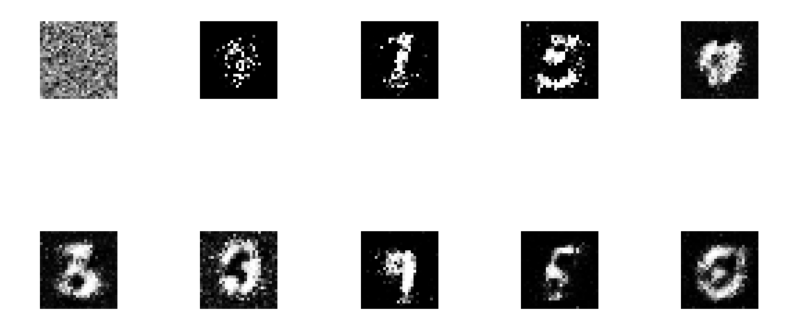

In [9]:
import os

# Function to load and display images from a directory
def display_generated_images(directory):
    images =['gan_image_0.png', 'gan_image_1000.png','gan_image_2000.png', 'gan_image_3000.png','gan_image_4000.png' ,'gan_image_5000.png',   'gan_image_6000.png', 'gan_image_7000.png', 'gan_image_8000.png','gan_image_9000.png']
    num_images = len(images
                     )
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(images):
        image_path = os.path.join(directory, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

# Example usage:
directory = 'generated_images1'
display_generated_images(directory)